In [76]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [77]:
df = pd.read_excel("acle.xlsx")
# df

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  735 non-null    datetime64[ns]
 1   Closing Price         735 non-null    int64         
 2   Trading Volume (shr)  735 non-null    int64         
 3   Opening               735 non-null    int64         
 4   High                  735 non-null    int64         
 5   Low                   735 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 34.6 KB


In [79]:
df.columns

Index(['Date', 'Closing Price', 'Trading Volume (shr)', 'Opening', 'High',
       'Low'],
      dtype='object')

In [97]:
describe = df.describe(include=int)
print(describe.to_latex(index=True))

\begin{tabular}{lrrrrr}
\toprule
 & Closing Price & Trading Volume (shr) & Opening & High & Low \\
\midrule
count & 734.000000 & 734.000000 & 734.000000 & 734.000000 & 734.000000 \\
mean & 13322.929155 & 65794.072207 & 13325.217984 & 13390.899183 & 13238.910082 \\
std & 2988.290427 & 97632.140244 & 3002.179044 & 3027.991605 & 2955.859150 \\
min & 10180.000000 & 253.000000 & 10060.000000 & 10200.000000 & 9360.000000 \\
25% & 10800.000000 & 12500.000000 & 10785.000000 & 10840.000000 & 10740.000000 \\
50% & 11630.000000 & 40424.500000 & 11640.000000 & 11770.000000 & 11600.000000 \\
75% & 16780.000000 & 77800.250000 & 16800.000000 & 16840.000000 & 16700.000000 \\
max & 22600.000000 & 1161771.000000 & 22850.000000 & 23600.000000 & 22000.000000 \\
\bottomrule
\end{tabular}



In [81]:
df[df['Trading Volume (shr)'] == 15342879]


,Date,Closing Price,Trading Volume (shr),Opening,High,Low
272,2022-04-25,12360,15342879,12360,12480,12300


In [82]:
df = df[df['Trading Volume (shr)'] != 15342879]

In [83]:
#Descriptive Statistics
df.describe()


,Date,Closing Price,Trading Volume (shr),Opening,High,Low
count,734,734.000000,7.340000e+02,734.000000,734.000000,734.000000
mean,2021-11-29 02:46:45.449591040,13322.929155,6.579407e+04,13325.217984,13390.899183,13238.910082
min,2020-05-25 00:00:00,10180.000000,2.530000e+02,10060.000000,10200.000000,9360.000000
25%,2021-03-01 06:00:00,10800.000000,1.250000e+04,10785.000000,10840.000000,10740.000000
50%,2021-12-06 12:00:00,11630.000000,4.042450e+04,11640.000000,11770.000000,11600.000000
75%,2022-08-29 18:00:00,16780.000000,7.780025e+04,16800.000000,16840.000000,16700.000000
max,2023-05-25 00:00:00,22600.000000,1.161771e+06,22850.000000,23600.000000,22000.000000
std,NaN,2988.290427,9.763214e+04,3002.179044,3027.991605,2955.859150


In [84]:
df['Trading Volume (shr)'].sum()

48292849

In [85]:
df['Date'] = pd.to_datetime(df['Date'])

In [86]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [87]:
fig = go.Figure(
        go.Candlestick(
            x = df.index,
            low = df['Low'],
            high = df['High'],
            close = df['Closing Price'],
            open = df['Opening'],
            increasing_line_color = 'green',
            decreasing_line_color = 'red'))

In [88]:
fig.update_layout(title='Acleda Stock Price and Volume',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False,
                  showlegend=False)

# **Plot a Histogram for Each Variable**

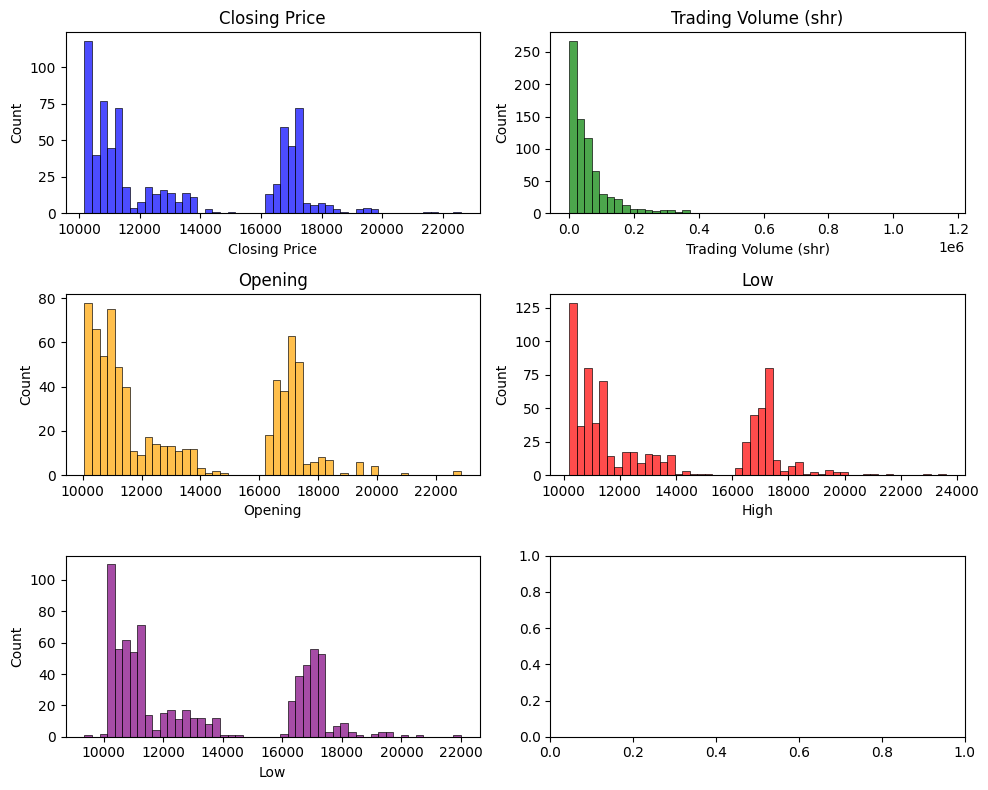

In [89]:
# Create a 2x2 matrix of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Flatten the 2x2 matrix of subplots for easier indexing
axes = axes.flatten()

# Plot histograms for each dataset
sns.histplot(df['Closing Price'], bins=50, kde=False, color='blue', alpha=0.7, ax=axes[0])
axes[0].set_title('Closing Price')

sns.histplot(df['Trading Volume (shr)'], bins=50, kde=False, color='green', alpha=0.7, ax=axes[1])
axes[1].set_title('Trading Volume (shr)')

sns.histplot(df['Opening'], bins=50, kde=False, color='orange', alpha=0.7, ax=axes[2])
axes[2].set_title('Opening')

sns.histplot(df['High'], bins=50, kde=False, color='red', alpha=0.7, ax=axes[3])
axes[3].set_title('High')

sns.histplot(df['Low'], bins=50, kde=False, color='purple', alpha=0.7, ax=axes[4])
axes[3].set_title('Low')

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("plot.png", dpi=300)
# Show the plots
plt.show()

### None is normal.

# **Confidence Interval of Each Variable**


In [90]:
close_ci1 = df['Closing Price'].mean() - (1.96*df['Closing Price'].std())/((df['Closing Price'].count())**1/2)
close_ci2 = df['Closing Price'].mean() + (1.96*df['Closing Price'].std())/((df['Closing Price'].count())**1/2)

print(close_ci1, " ", close_ci2)

13306.969893087735   13338.888417538968


Closing Price

Lower bound: 13306.969893087735

Upper bound: 13338.888417538968

In [91]:
vol_ci1 = df['Trading Volume (shr)'].mean() - (1.96*df['Trading Volume (shr)'].std())/((df['Trading Volume (shr)'].count())**1/2)
vol_ci2 = df['Trading Volume (shr)'].mean() + (1.96*df['Trading Volume (shr)'].std())/((df['Trading Volume (shr)'].count())**1/2)

print(vol_ci1, " ", vol_ci2)

65272.65805210528   66315.48636206365


Trading Volume

Lower bound: 65272.65805210528

Upper bound: 66315.48636206365

In [92]:
open_ci1 = df['Opening'].mean() - (1.96*df['Opening'].std())/((df['Opening'].count())**1/2)
open_ci2 = df['Opening'].mean() + (1.96*df['Opening'].std())/((df['Opening'].count())**1/2)

print(open_ci1, " ", open_ci2)

13309.184547885929   13341.251419416523


Opening Price

Lower bound: 13309.184547885929 

Upper bound: 13341.251419416523

In [93]:
high_ci1 = df['High'].mean() - (1.96*df['High'].std())/((df['High'].count())**1/2)
high_ci2 = df['High'].mean() + (1.96*df['High'].std())/((df['High'].count())**1/2)

print(high_ci1, " ", high_ci2)

13374.72789224542   13407.070472877196


Highest Price

Lower bound: 13374.72789224542

Upper bound: 13407.070472877196

In [94]:
low_ci1 = df['Low'].mean() - (1.96*df['Low'].std())/((df['Low'].count())**1/2)
low_ci2 = df['Low'].mean() + (1.96*df['Low'].std())/((df['Low'].count())**1/2)

print(low_ci1, " ", low_ci2)

13223.12402198013   13254.696141507608


Lowest Price

Lower bound: 13223.12402198013 

Upper bound: 13254.696141507608

# Thanks for Your Attention !